# Mean Cell Model

The *Mean Cell Model* makes the assumption that all cell behave the same. So, this model allows to stimate the population parameters from the observations of the system. Therefore, it is rather used to estimate variability that result as noise of the measure device.

In [1]:
#required libraries
import simsysbio as s2b
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

**Loads data**. The data is loaded to save time computing a new whole population.

In [2]:
tog = np.load("tog.npy")#input stimulus
hog = np.load("hog.npy")#time vector
Obs = np.load("MCobs.npy")#observations

**Plots data to be estimated**

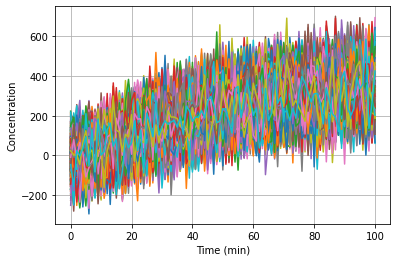

In [3]:
plt.figure()
for i in range(len(Obs)):
    plt.plot(tog, Obs[i,:])
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()

**Sets biological system configuration**

In [4]:
#molecular species
especies = ['mRNA', 'Proteína']

#Stoichiometric matrices
reactivos = np.array([[0, 1, 1, 0],[0, 0, 0, 1]])
productos = np.array([[1, 0, 1, 0],[0, 0, 1, 0]])

#kinetic parameters names
parametros = ['c1', 'c2', 'c3', 'c4']

#system input
entrada = 'U'
idxR = 0

#computes simbolic system of differential equations
ecuaciones, variables = s2b.simbODE(especies, reactivos, productos, parametros,
                                   inputN=entrada)
#kinetic parameters 
parsValues = [4.0, 0.010, 1.0, 0.006]

#initial concentrations
sp0 = np.zeros(len(especies))

#initial noise measurement guess
noise = np.array([0,0])

#regressor variables
regressor = {
        "ODEs": ecuaciones,
        "matrizR": reactivos,
        "matrizP": productos,
        "vPars": parsValues,
        "idxR": idxR,
        "inpU": hog,
        "Vtime": tog,
        "species0":sp0,
        "noise":noise
        }
regressor.update(variables)

**Inferring process**

In [5]:
#saves observations
regressor["allObs"] = Obs

#initial parameters guesses
errAB = np.array([9.0, 0.009])
regressor["errPars"] = errAB

beta0 = np.array([2.056, 0.038, 0.187, 0.184])

In [6]:
#defines minus-log likelihood functions to perfome estimation
def MLL_mc(pars, regressor):
    print(pars)
    #computes partial simulation
    cellExpr= s2b.solveODE(pars, regressor)
    meanP = cellExpr[-1,:]
    
    sdP = regressor["errPars"][0] + regressor["errPars"][1]*meanP
    sdP = np.absolute(sdP)

    ncells = len(regressor["allObs"])
    
    fSim = np.tile(meanP, (ncells,1))
    hSim = np.tile(sdP, (ncells,1))
    
    Observaciones = regressor["allObs"]
    
    mllmc = MLLmeasure(Observaciones, fSim, hSim)
    
    return mllmc

def MLLmeasure(Observaciones, fSim, hSim):    
    MLL1 = np.sum(np.sum(0.5*(((Observaciones - fSim)/hSim)**2), axis=1))
    MLL2 = np.sum(np.sum(np.log(hSim), axis=1))
    MLL = MLL1 + MLL2
    return MLL

In [ ]:
#performs kinetic parameter estimation
resultMLL = fmin(MLL_mc, x0 = beta0, args=(regressor,))
regressor["betaCal"] = resultMLL

[2.056 0.038 0.187 0.184]
[2.1588 0.038  0.187  0.184 ]
[2.056  0.0399 0.187  0.184 ]
[2.056   0.038   0.19635 0.184  ]
[2.056  0.038  0.187  0.1932]
[2.1074   0.0361   0.191675 0.1886  ]
[2.1331    0.0342    0.1940125 0.1909   ]
[2.14595    0.0361     0.19518125 0.17825   ]
[2.190925   0.03515    0.19927188 0.170775  ]
[2.2134125  0.034675   0.20131719 0.1808375 ]
[2.13791875 0.0330125  0.20847578 0.17925625]
[2.12747812 0.03051875 0.21921367 0.17688438]
[2.27645781 0.02927188 0.21055762 0.17569844]
[2.38668672 0.02490781 0.21766143 0.17154766]
[2.32615117 0.02842578 0.22471958 0.15912227]
[2.30220801 0.02482617 0.22911609 0.15832715]
[2.34660576 0.01990176 0.24301554 0.14707197]
[2.40253589 0.01672705 0.25303323 0.15653813]
[2.50834133 0.00751558 0.27991391 0.1494197 ]
[2.65641437 0.00985671 0.26344156 0.13669642]
[2.62287292 0.00266515 0.27729664 0.14324561]
[ 2.77123379 -0.01021517  0.30358517  0.13530728]
[ 2.75461091 -0.01137837  0.32731666  0.11270004]
[ 2.938573   -0.02952146  

[ 5.59734654  0.01740493  0.39392447 -0.01154527]
[ 6.33394271  0.02739449  0.39021851 -0.01596044]
[ 6.24848971  0.0249727   0.39380385 -0.01472018]
[ 6.75722681  0.0305796   0.39310319 -0.0159931 ]
[ 6.20773025  0.02511054  0.39502424 -0.0169367 ]
[ 5.74994247  0.01933133  0.39419941 -0.01289312]
[ 5.17913396  0.01108939  0.40072065 -0.01098786]
[ 5.67242191  0.01620576  0.3988865  -0.01180179]
[ 5.69855896  0.01503437  0.40085876 -0.01082253]
[ 6.03048921  0.0210987   0.39585827 -0.01218884]
[ 6.68460621  0.02912915  0.3916395  -0.01432447]
[ 7.43734234  0.03814903  0.38709892 -0.01599277]
[ 6.95749764  0.03029607  0.39461049 -0.01396903]
[ 7.56127522  0.03577843  0.39481603 -0.01450699]
[ 7.11534315  0.03005757  0.39551214 -0.01203538]
[ 7.87577062  0.038411    0.39328465 -0.01449   ]
[ 8.79841133  0.04706715  0.39199784 -0.01564058]
[ 9.75762707  0.06049173  0.38385371 -0.01826534]
[ 6.71332598  0.02639871  0.3966075  -0.01268323]
[ 7.65683551  0.0315019   0.40236783 -0.01144032]


In [ ]:
#Solves system of ED with estimated kinetic parameters
cellCal = s2b.solveODE(resultMLL, regressor)
sdC = errAB[0] + errAB[1]*cellCal[-1,:]

#calculates statistics from observations
uObs = np.mean(Obs, axis=0)
sdObs = 80.0 + 0.05*uObs

plt.figure()
plt.plot(uObs)
plt.plot(uObs + sdObs, 'b-')
plt.plot(uObs - sdObs, 'b-')
plt.plot(cellCal[-1,:])
plt.plot(cellCal[-1,:] + sdC, 'y-')
plt.plot(cellCal[-1,:] - sdC, 'y-')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()

In [ ]:
#defines function to estimate noise parameters
def MLL_mcErr(noisePar, regressor):
    print(noisePar)
    #calcula la simulación
    cellExpr= s2b.solveODE(regressor["betaCal"], regressor)
    meanP = cellExpr[-1,:]
    
    sdP = noisePar[0] + noisePar[1]*meanP
    sdP = np.absolute(sdP)

    ncells = len(regressor["allObs"])
    
    fSim = np.tile(meanP, (ncells,1))
    hSim = np.tile(sdP, (ncells,1))
    
    Observaciones = regressor["allObs"]
    
    mllmc = MLLmeasure(Observaciones, fSim, hSim)
    
    return mllmc

In [ ]:
#performs noise parameters estimation
resultMLLErr = fmin(MLL_mcErr, x0 = errAB, args=(regressor,))
errAB = resultMLLErr

In [ ]:
#calculates estimated standard deviation curve from noise parameters
sdCal = errAB[0] + errAB[1]*cellCal[-1,:]

plt.figure()
plt.plot(uObs)
plt.plot(uObs + sdObs, 'b-')
plt.plot(uObs - sdObs, 'b-')
plt.plot(cellCal[-1,:])
plt.plot(cellCal[-1,:] + sdCal, 'y-')
plt.plot(cellCal[-1,:] - sdCal, 'y-')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()